In [3]:
import torch.nn as nn
import torch

In [10]:
import torch
import torch.nn.functional as F

# Define input and target tensors of different sizes
input_tensor = torch.randn(2, 1, 85)

target_tensor = torch.randn(8, 128)

# Resize the input and target tensors to a common shape
new_shape = (8, 1, 85)
input_tensor_resized = F.interpolate(input_tensor, size=new_shape[1:], mode='nearest')
target_tensor_resized = F.interpolate(target_tensor.unsqueeze(0), size=new_shape[1:], mode='nearest').squeeze(0)
print("Input",input_tensor.size())
print("Target",target_tensor.size)

# Instantiate the KLDivLoss object



ValueError: Input and output must have the same number of spatial dimensions, but got input with spatial dimensions of [85] and output size of (1, 85). Please provide input tensor in (N, C, d1, d2, ...,dK) format and output size in (o1, o2, ...,oK) format.

In [18]:
base_path="Single_Labels_ess"


In [49]:
def writer_dict(file_data,file):
    
    """
        file_data: dict which contains the writer id and line text per image
        file: Name of the xml file from which data has been read
        function of this function is to take in the dict and write it in the json file with the modified path
        ("a01-000u\\a01-000u"-> a01-000u\\a01-000u-00.json")
        
    """

    for number,dist in enumerate(file_data.items()):
        if not os.path.exists(base_path):
            os.makedirs(base_path)
        path=os.path.join(base_path,file[17:-4]+"-"+f"{number:02d}")
        with open(path+".json","w") as file_json:
            json.dump(dist,file_json)
def xml_to_text(xml):
    """
        XML: list of the xml files paths 
        read the  specific text and the writer id and call a writer-dict functions
    """
    for xml_file in tqdm.tqdm(xml):
        print(xml_file)
        tree = ET.parse(source=xml_file, parser=None)
        root = tree.getroot()
        file_data={}
        writer_id=""
        for child in root.iter("form"):
            data=child.attrib
            writer_id=(data["writer-id"])


        for child in root.iter("line"):
            data = child.attrib
            file_data[data["text"]]=writer_id

            #file_data[xml_file[0]]=(data["text"],writer_id)
        writer_dict(file_data,xml_file)

In [52]:
import cv2
img=cv2.imread("line_data/Images/a01/a01-000u/a01-000u-00.png")
cv2.imshow("Img",img)
cv2.waitkey(0)

AttributeError: module 'cv2' has no attribute 'waitkey'

207

(62, 408, 3)
(89, 1661, 3)


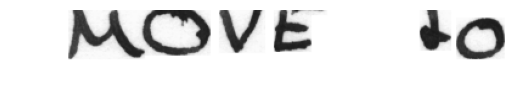

In [99]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
image_path="line_data/Images/a01/a01-000u/a01-000u-00.png"
image=cv2.imread(image_path)
x=51
y=27
h=768
w=408
cropped_image = image[y:y+h, x:x+w]
print(cropped_image.shape)
print(image.shape)
# Display the image
plt.imshow(cropped_image)
plt.axis('off')  # Turn off axis
plt.show()

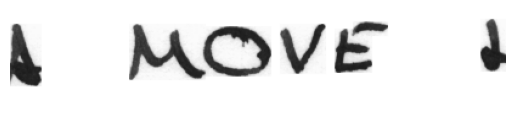

In [122]:
import cv2

# Load image
img = cv2.imread("line_data/Images/a01/a01-000u/a01-000u-00.png")

# Define x, y, w, h dimensions for the crop
x = 1
y = 10
w = 408 
h = 768

# Crop the image
crop_img = img[y:y+h, x:x+w]

# Display the cropped image
plt.imshow( crop_img)
plt.axis("off")
plt.show()

In [74]:
1661/8

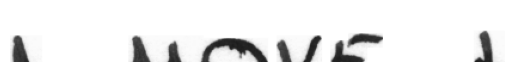

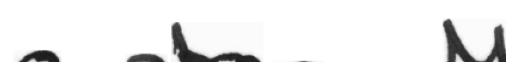

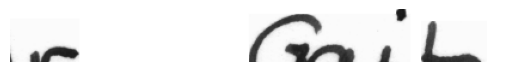

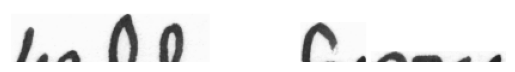

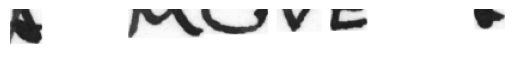

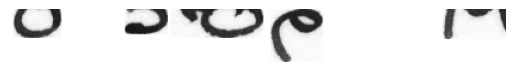

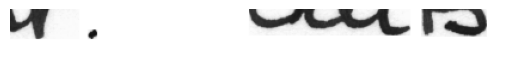

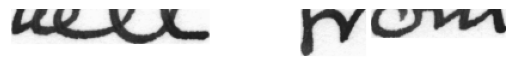

In [88]:
import cv2

# Load the image
image_path="line_data/Images/a01/a01-000u/a01-000u-00.png"

image = cv2.imread(image_path)  # Replace 'your_image.jpg' with the actual image path

# Get the dimensions of the original image
height, width, _ = image.shape

# Define the number of rows and columns for the grid
num_rows = 2
num_cols = 4

# Calculate the dimensions of each subregion
sub_height = height // num_rows
sub_width = width // num_cols

# Initialize a list to store the cropped images
cropped_images = []

# Iterate over each subregion and perform the crop
for row in range(num_rows):
    for col in range(num_cols):
        # Calculate the starting and ending coordinates of the subregion
        start_x = col * sub_width
        start_y = row * sub_height
        end_x = start_x + sub_width
        end_y = start_y + sub_height
        
        # Crop the subregion from the original image
        cropped_image = image[start_y:end_y, start_x:end_x]
        
        # Append the cropped image to the list
        cropped_images.append(cropped_image)

# Display the cropped images
for i, cropped_image in enumerate(cropped_images):
    plt.imshow(cropped_image)
    plt.axis('off')  # Turn off axis
    plt.show()

In [72]:
filename = 'lines.txt'  # Replace 'your_file.txt' with the actual file path

lines = []  # List to store the selected lines

with open(filename, 'r') as file:
    for line in file:
        line = line.strip()  # Remove leading/trailing whitespaces
        
        # Skip lines starting with '#'
        if not line.startswith('#'):
            lines.append(line)

# Print the lines or perform further operations
print(len((lines[0].split()))+len((lines[0].split()[-1].split("|"))))
print(((lines[0].split()[-1].split("|"))))

16
['A', 'MOVE', 'to', 'stop', 'Mr.', 'Gaitskell', 'from']


In [44]:
tree=ET.parse(source="line_data/Labels/a01-000u.xml", parser=None)
root = tree.getroot()
        
for child,cmp in zip(root.iter("word"),root.iter("cmp")):
            data=child.attrib
            lbl=cmp.attrib
            print(data,lbl)


{'id': 'a01-000u-00-00', 'sentence-start': 'yes', 'tag': 'AT', 'text': 'A'} {'x': '408', 'y': '768', 'width': '27', 'height': '51'}
{'id': 'a01-000u-00-01', 'tag': 'NN', 'text': 'MOVE'} {'x': '507', 'y': '768', 'width': '63', 'height': '46'}
{'id': 'a01-000u-00-02', 'tag': 'TO', 'text': 'to'} {'x': '568', 'y': '770', 'width': '56', 'height': '41'}
{'id': 'a01-000u-00-03', 'tag': 'VB', 'text': 'stop'} {'x': '631', 'y': '768', 'width': '38', 'height': '41'}
{'id': 'a01-000u-00-04', 'tag': 'NPT', 'text': 'Mr.'} {'x': '676', 'y': '772', 'width': '31', 'height': '36'}
{'id': 'a01-000u-00-05', 'tag': 'NP', 'text': 'Gaitskell'} {'x': '691', 'y': '766', 'width': '29', 'height': '12'}
{'id': 'a01-000u-00-06', 'tag': 'IN', 'text': 'from'} {'x': '796', 'y': '764', 'width': '26', 'height': '43'}
{'id': 'a01-000u-01-00', 'tag': 'VBG', 'text': 'nominating'} {'x': '826', 'y': '780', 'width': '40', 'height': '34'}
{'id': 'a01-000u-01-01', 'tag': 'DTI', 'text': 'any'} {'x': '919', 'y': '783', 'width': 

In [35]:
import glob,tqdm,os,json
import xml.etree.ElementTree as ET

xml_file=sorted(glob.glob("line_data/Labels/*"))
print("Total XML Files=", len(xml_file))
len(xml_file)
del xml_file[1230] # BAD SAMPLE
xml_to_text(xml_file[:1])


Total XML Files= 1540


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 241.70it/s]

line_data/Labels\a01-000u.xml


In [ ]:
No_Images=glob.glob("Line_data/Images/*/*/*")
print("Total number of the Images Files=",len(Images))

In [ ]:
No_xml=(sorted(glob.glob(base_path+"/*")))
print(f"Total number of json Files= {len(No_xml)}")

In [ ]:
#os.path.join(base_path,Images[0].split("\\")[-1][:-4]+".json")
"""How to convert the path from .png to .json """

In [ ]:



def Load_Image_Label(image_path):
    # Open the image file
    label=tuple()
    json_path=os.path.join(base_path,image_path.split("\\")[-1][:-4]+".json")
    with open(json_path,"r") as json_file:
        label=json.load(json_file)
    img = imread(image_path, 0)
    img = 255 - img
    img_height, img_width = img.shape[0], img.shape[1]
    n_repeats = int(np.ceil(150 / img_width))
    padded_image = np.concatenate([img] * n_repeats, axis=1)
    padded_image = padded_image[:15, :150]
    resized_img = resize(padded_image, (150, 15))
    return (resized_img,label)
    #plt.imshow(img)
    #plt.show()


In [ ]:
display_image(Images[92])

In [ ]:
import os
import glob
import tqdm
from cv2 import imread, resize,imshow,destroyAllWindows,waitKey
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

import torch
from torchvision import transforms as transforms

import glob,os,sys
import json
import xml.etree.cElementTree as ET
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
from cv2 import imread, resize
class CustomImage:
    def __init__(
        self,
        base_path="Single_Labels",
        img_dir=glob.glob("Line_data/Images/*/*/*"),
        transform=transforms.ToTensor(),
    ):

        self.base_path=base_path
        self.transform = transform
        self.img_dir = img_dir
        
    


    def Load_Image_Label(self,image_path):
        # Open the image file
        label=tuple()
        json_path=os.path.join(self.base_path,image_path.split("\\")[-1][:-4]+".json")
        with open(json_path,"r") as json_file:
            label=json.load(json_file)
        img = imread(image_path, 0)
        img = 255 - img
        img_height, img_width = img.shape[0], img.shape[1]
        n_repeats = int(np.ceil(150 / img_width))
        padded_image = np.concatenate([img] * n_repeats, axis=1)
        padded_image = padded_image[:15, :150]
        resized_img = resize(padded_image, (150, 15))
        return (resized_img,label)
        #plt.imshow(img)
        #plt.show()


    def __len__(self):
        return len(self.img_dir)

    def __getitem__(self, idx):
        #import pdb;pdb.set_trace()
        Image,Labels=self.Load_Image_Label(self.img_dir[idx])
        return torch.tensor(Image, device="cpu").float(), Labels
        #return Image,Labels


In [ ]:
 TextDatasetObj = CustomImage()
    #no_workers = batch_size // num_example
dataset = torch.utils.data.DataLoader(
        TextDatasetObj, batch_size=2, shuffle=True, num_workers=0,
    )

In [ ]:
import os

path = "Single_Ladhjsdhdsbels\\a01-000u-00"
new_path = os.path.join(*path.split("\\")[1:])
print(new_path)


# for keys,value in file_data.items():
    print({keys:value})

In [ ]:
char_embd=torch.rand(2,5440
                       )
from torch import nn
linear=nn.Linear(64*85,32)
upsample=linear(char_embd)
upsample.shape

## import xml.etree.ElementTree as ET

# Load the XML data from a file
tree = ET.parse(xml_file[0])

# Get the root element
root = tree.getroot()

# Find the form element that contains the writer ID
form = root.find(".//form[@type='writer-id']")
print(form)
# Get the writer ID attribute value from the form element
writer_id = form.attrib['writer-id']

# Find the line element with the specified ID
line = root.find(".//line[@id='a01-000u-00']")

# Get the text attribute value from the line element
text = line.attrib['text']

# Print the results
print("Writer ID:", writer_id)
print("Text:", text)


In [ ]:
print(line.get("writer-id"))

# Data Structure 

######  Image: words_data\\a01\\a01-000u\\a01-000u-00-00.png
######  Label:labels\\a01-000u.xml

In [ ]:
def XML_TO_JSON():
    label_dir = "labels/"
    label_file = glob.glob(os.path.join(label_dir, "*.xml"))
    for file in tqdm(label_file):
        tree = ET.parse(source=file, parser=None)
        root = tree.getroot()
        data_dict = dict()
        for child in root.iter("word"):
            data = child.attrib
            data_dict[data["id"]] = data["text"]

        with open(os.path.join("json/", file[7:-4] + ".json"), "w") as f:
            json.dump(data_dict, f)
            f.close()


def data_set(path: str, data_name: str):
    with open(path, "rb") as file:
        grades = [x.strip() for x in file.readlines()]
    print("No. of " + data_name + "_Files", len(grades))
    return grades


#if __name__ == "__main__":
   


# Path Initilization

In [ ]:
base_folder = os.path.join("line_data/")
word_folder = glob.glob(base_folder+"Images/*/*")
json_dict=glob.glob(base_folder+"Labels/*")
print("base data length",len(word_folder))
print("json dict length",(len(json_dict)))


In [ ]:
word_folder

In [ ]:
data=list()
for i in json_dict:
    with open(i) as json_file:
        data.append((json.load(json_file)))

##### creating dictonary 

In [ ]:
h=[]
import json

for lbl in data:
    for words in lbl.values():
        h.append(words)

len(list(set(h)))

In [ ]:
words_vocab=list(set(h))
with open('words_vocab.txt','w') as file:
    newline = os.linesep
    for i in words_vocab:
        file.write(newline+i)

lis=list()
with open('words_vocab.txt','r') as file:
    for line in file:
        line = line.rstrip()
        lis.append(line)
string=[string for string in lis if string!=""]
len(string)

In [ ]:
from torchtext.vocab import vocab

In [ ]:
data1={"a":1,"b":3,"c":5}
data2={"l":5,"f":0,"h":10}
data1

In [ ]:
vocab(data())

In [ ]:


vocab={' ',
 '!',
 '"',
 '#',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [ ]:
vocab

In [ ]:
([[set(words) for char in lbl.values() for words in char] for lbl in data])

In [ ]:
for j in json_dict:
    data=read_json_files(j)

In [ ]:
def show_image(image):
    #show_image
    #img = mpimg.imread(image)
    imgplot = plt.imshow(img)
    plt.show()

In [ ]:
if n

In [ ]:
len(word_folder)*0.8

In [ ]:
train_data={}
count=0
max_width=192
for image,label in tqdm(zip(word_folder[:10],json_dict[:10])):
        folder_data=list()
        image_list=glob.glob(os.path.join(image,"*.png"))
        data=read_json_files(label)
        for index,s_image in enumerate(image_list):
            tmp_dict=dict()
            try:
                img= Image.open(s_image)
                hight,width=img.size
                n_repeats = int(np.ceil(max_width/width))
                repeated_image = np.tile(np.array(img), (1, n_repeats, 1))
                concatenated_img = np.concatenate(repeated_image,axis=0)
                # Convert the numpy array back to an image
                #output_img = Image.fromarray(concatenated_img)
                #plt.imshow(concatenated_img)
                #print(concatenated_img.shape)
                #print(f"{type(img)=}")
                #img=img.resize((h,79))
                tmp_dict["img"]=concatenated_img
                tmp_dict["label"]=data[index]
            except UnidentifiedImageError:
                problem_files.append(s_image)
            folder_data.append(tmp_dict)
            c=str(count)

        train_data[c]=folder_data
        count+=1
           
count
       

   


In [ ]:
train_data["0"][:1]

In [ ]:
img=train_data["0"][:][:1][0]["img"]
show_image(img)

In [ ]:
test_data={}
count=1231
problem_files=[]
for image,label in tqdm(zip(word_folder[10:20],json_dict[10:20])):
        folder_data=list()
        image_list=glob.glob(os.path.join(image,"*.png"))
        data=read_json_files(label)
        for index,s_image in enumerate(image_list):
            tmp_dict=dict()
            try:
                img=Image.open(s_image)
                h,w=img.size
                img=img.resize((h,79))

                #tmp_dict["img"]=img
                tmp_dict["label"]=data[index]
                img.load()
            except UnidentifiedImageError:
                problem_files.append(s_image)
            folder_data.append(tmp_dict)
            c=str(count)
        test_data[c]=folder_data
        count+=1
           


In [ ]:
print(f"No. of samples in train data {len(train_data)} , No. of Samples in test_data {len(test_data)}")

# dividing dataset into training and test phase
#### total dataset 13551  test=2710   train=10841

In [ ]:
data_set={"train":train_data,"test":test_data}

# Creating pickel file

In [ ]:
with open("IMA-32_data_small.pickle", "wb") as file:
    pickle.dump(data_set, file, pickle.HIGHEST_PROTOCOL)


In [ ]:
!dir

In [ ]:
!cd hand/files
!dir

In [ ]:
class TextDataset():
    def __init__(self, base_path ="hand/files/IMA-32_data.pickle" ,  num_examples = 15, target_transform=None):

        self.NUM_EXAMPLES = num_examples
  
        #base_path = DATASET_PATHS
        file_to_store = open(base_path, "rb")
        self.IMG_DATA = pickle.load(file_to_store)['train']
        self.IMG_DATA  = dict(list( self.IMG_DATA.items()))#[:NUM_WRITERS])
        if 'None' in self.IMG_DATA.keys():
            del self.IMG_DATA['None']
        self.author_id = list(self.IMG_DATA.keys())

        self.transform = get_transform(grayscale=True)
        self.target_transform = target_transform
        
        self.collate_fn = TextCollator()


    def __len__(self):
        return len(self.author_id)

    def __getitem__(self, index):

        

        NUM_SAMPLES = self.NUM_EXAMPLES


        author_id = self.author_id[index]

        self.IMG_DATA_AUTHOR = self.IMG_DATA[author_id]
        random_idxs = np.random.choice(len(self.IMG_DATA_AUTHOR), NUM_SAMPLES, replace = True)

        rand_id_real = np.random.choice(len(self.IMG_DATA_AUTHOR))
        real_img = self.transform(self.IMG_DATA_AUTHOR[rand_id_real]['img'].convert('L'))
        real_labels = self.IMG_DATA_AUTHOR[rand_id_real]['label'].encode()


        imgs = [np.array(self.IMG_DATA_AUTHOR[idx]['img'].convert('L')) for idx in random_idxs]
        labels = [self.IMG_DATA_AUTHOR[idx]['label'].encode() for idx in random_idxs]
       
        max_width = 192 #[img.shape[1] for img in imgs] 
        
        imgs_pad = []
        imgs_wids = []

        for img in imgs:

            img = 255 - img
            img_height, img_width = img.shape[0], img.shape[1]
            outImg = np.zeros(( img_height, max_width), dtype='float32')
            outImg[:, :img_width] = img[:, :max_width]

            img = 255 - outImg

            imgs_pad.append(self.transform((Image.fromarray(img))))
            imgs_wids.append(img_width)

        imgs_pad = torch.cat(imgs_pad, 0)
        

        item = {'simg': imgs_pad, 'swids':imgs_wids, 'img' : real_img, 'label':real_labels,'img_path':'img_path', 'idx':'indexes', 'wcl':index}

        return item


In [ ]:
file_to_store = open("IMA-32_data_small.pickle", "rb")
IMG_DATA = pickle.load(file_to_store)['train']
IMG_DATA  = dict(list( IMG_DATA.items()))#[:NUM_WRITERS])
if 'None' in IMG_DATA.keys():
    del IMG_DATA['None']
author_id = list(IMG_DATA.keys())


In [ ]:
import torchvision.transforms as transforms

def get_transform(grayscale=False, convert=True):

    transform_list = []
    if grayscale:
        transform_list.append(transforms.Grayscale(1))

    if convert:
        transform_list += [transforms.ToTensor()]
        if grayscale:
            transform_list += [transforms.Normalize((0.5,), (0.5,))]
        else:
            transform_list += [transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]

    return transforms.Compose(transform_list)

In [ ]:
!pip install torchvision

In [ ]:
IMG_DATA_AUTHOR = IMG_DATA["5"]
random_idxs = np.random.choice(len(IMG_DATA_AUTHOR), 5, replace = True)
rand_id_real = np.random.choice(len(IMG_DATA_AUTHOR))
real_img = (IMG_DATA_AUTHOR[rand_id_real]['image'].convert('L'))
real_labels = IMG_DATA_AUTHOR[rand_id_real]['label'].encode()


In [ ]:
real_labels

In [ ]:
real_img

In [ ]:
data=TextDataset(
)

In [ ]:
img_path="words_data/a02/a02-004/a02-004-00-01.png"

In [ ]:
import cv2 
import torchvision.transforms as transforms
from PIL import Image


In [ ]:
  
# Using cv2.imread() method
# Using 0 to read image in grayscale mode
img = cv2.imread(img_path, 0)
  
# Displaying the image
print(img)
black=1-img/255
print((black.shape))

In [ ]:
#cv2.imshow('balck', black)
cv2.imshow('image', img)
key = cv2.waitKey(0)#pauses for 3 seconds before fetching next image


In [ ]:
img


In [ ]:
Image.fromarray(img)

In [ ]:
transforms((Image.fromarray(img)))

In [ ]:
img.size

In [ ]:
n_repeats = int(np.ceil(192/w))
n_repeats

In [ ]:
repeated_image = np.tile(np.array(img), (n_repeats))
h,w=repeated_image.shape

show_image(repeated_image)

In [ ]:
padded_image = np.concatenate([img] * 10, axis=0)

    # Crop the image to the desired width
padded_image = padded_image[:, :192]
show_image(padded_image)

In [ ]:
a=np.arange(10,100).reshape(3,30)
a

In [ ]:
[a]*2

In [ ]:
str1=[b'not', b'of', b'the', b'of', b'Mr.', b'ineffectuay', b'and', b'the', b'Shelagh', b'of', b'is', b'terms', b',', b'unit']

In [ ]:
vocab=[]
for i in str1:


In [ ]:
import torch.nn as nn
import torch

In [ ]:
x=b'unit000000000000000'.decode("utf-8") 
x

In [ ]:
x=torch.tensor(x)
x.size()

In [ ]:
embedding = nn.Embedding(50, 50, max_norm=True)

In [ ]:
max([i for i in str1])

In [ ]:
for i in str1:
    print(embedding(x))

In [ ]:
str1

In [ ]:
char='*'
repeat=0
for index,_ in enumerate(str1):
    repeat=19-len(str1[index])
    str1[index]=(str(str1[index].decode())+"0"*repeat)
    

In [ ]:
str1=[b'not0000000000000000',
 b'of00000000000000000',
 b'the0000000000000000',
 b'of00000000000000000',
 b'Mr.0000000000000000',
 b'ineffectuality00000',
 b'and0000000000000000',
 b'the0000000000000000',
 b'Shelagh000000000000',
 b'of00000000000000000',
 b'is00000000000000000',
 b'terms00000000000000',
 b',000000000000000000',
 b'unit000000000000000']

In [ ]:
abs(20-14)

In [ ]:
vocab={'o', 'u', ':', '6', 'g', 'r', '!', 'j', 'c', ',', 'y', 'f', 'b', 'm', '-', '9', '3', 'C', 't', 'v', ')', 'n', '.', 'E', '"', 'S', "'", 'J', 'T', 'w', 'O', 'D', 'P', 'N', 's', 'I', 'h', ';', 'F', 'i', '?', 'k', 'a', 'p', 'W', 'A', 'z', 'M', 'G', 'e', '0', 'd', 'l'}

In [ ]:
encoder={data:i for i,data in enumerate(vocab)}
decoder={i:data for i ,data in enumerate(vocab)}

In [ ]:
encoder

In [ ]:
def encoding(label,encoder):
    lst=[]
    lst.append([encoder[char]for lbl in label for char in lbl])
    return 

In [ ]:
encoder['i']

In [ ]:
encoding(str1,encoder)

In [4]:
import torch
import torch.nn as nn
import torch.nn as nn
import torch.utils.model_zoo as model_zoo
import numpy as np
import cv2



class Visual_encoder(nn.Module):
    def __init__(self) -> None:
        super(Visual_encoder, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1, out_channels=100, kernel_size=3, stride=1, padding=1
            ),
            nn.ReLU(),
            nn.BatchNorm2d(100),
            nn.Conv2d(
                in_channels=100, out_channels=100, kernel_size=3, stride=1, padding=1
            ),
            nn.ReLU(),
        )

        self.conv2 = nn.Conv2d(
            in_channels=100, out_channels=32, kernel_size=3, stride=1, padding=1
        )
        self.conv3 = nn.Conv2d(
            in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1
        )
        self.conv4 = nn.Conv2d(
            in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1
        )
        self.conv5 = nn.Conv2d(
            in_channels=128, out_channels=32, kernel_size=3, stride=1, padding=1
        )

        self.upsample1 = nn.Upsample(scale_factor=2, mode="nearest")
        # self.upsample2 = nn.Upsample(scale_factor=2, mode='nearest')
        # self.upsample3 = nn.Upsample(scale_factor=2, mode='nearest')

    def forward(self, x):
        print("Shape of the Input in VGG network:-", x.shape)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.upsample1(x)
        # x=self.upsample2(x)
        # x=self.upsample3(x)
        return x


            
class TextEncoder_FC(nn.Module):
    def __init__(self) -> None:
        super(TextEncoder_FC, self).__init__()
        """
         self.embed = Apply the embedding layer on the text tensor(2,85) -> (batch_size,max_text_len) -> out= (batch_size,max_len,embedding_size)
         xx = (batch_size, max_len_embedding_size)
         xxx = reshape the embedding output  from (batch_size,max_len_text,embedding_size) -> (batch_size,max_len*embedding_size) 
         out = Contained the output of the text style_network out_dim -> (batch_size,4096)

         xx_new =  apply the Linear layer on the embedding output 

        """
        embedding_size = 64
        Max_str = 81
        text_max_len = Max_str + 4#
        vocab=81
        self.embed = nn.Embedding((vocab), embedding_size)  # 81,64
        self.fc = nn.Sequential(
            nn.Flatten(),  # flatten the input tensor to a 1D tensor
            nn.Linear(text_max_len * embedding_size, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(inplace=False),
            nn.Linear(1024, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(inplace=False),
            nn.Linear(2048, 5440),
        )
        self.linear = nn.Linear(
            embedding_size * text_max_len, embedding_size * text_max_len
        )  # 64,512
        self.linear1 = nn.Linear(embedding_size, embedding_size * text_max_len)

    def forward(self, x):
        """
        X: tensor of dim batch_size, max_text_len and embed_dim plz take other things will work accordingly 
        just take care of it. 
        
        """
        xx = self.embed(x.squeeze(-1))  # b,t,embed

        batch_size = xx.shape[0]
        xxx = xx.reshape(batch_size, -1)  # b,t*embed
        out = self.fc(xxx)

        """embed content force"""
        xx_new = self.linear(xx.view(2, -1)).view(
            xx.size(0), xx.size(1), xx.size(2)
        )  # b, text_max_len, 512

        ts = xx_new.shape[1]  # b,512,8,27
        height_reps = IMAGE_HEIGHT  # 8 [-2]
        width_reps = max(1, IMAGE_WIDTH // ts)  # [-2] 27
        tensor_list = list()
        for i in range(ts):
            text = [xx_new[:, i : i + 1]]  # b, text_max_len, 512
            tmp = torch.cat(text * width_reps, dim=1)
            tensor_list.append(tmp)

        padding_reps = IMAGE_WIDTH % ts
        if padding_reps:
            embedded_padding_char = self.embed(torch.full((1, 1), 2, dtype=torch.long,device=device))
            # embedded_padding_char = self.linear1(embedded_padding_char)
            padding = embedded_padding_char.repeat(batch_size, padding_reps, 1)
            tensor_list.append(padding)

        res = torch.cat(
            tensor_list, dim=1
        )  # b, text_max_len * width_reps + padding_reps, 512
        res = res.permute(0, 2, 1).unsqueeze(
            2
        )  # b, 512, 1, text_max_len * width_reps + padding_reps
        final_res = torch.cat([res] * height_reps, dim=2)
        return out, final_res


In [5]:
import torch 
a=[1,2,3,4,5]
torch.FloatTensor(a)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
class GenModel_FC(nn.Module):
    def __init__(self):
        super(GenModel_FC, self).__init__()
        self.enc_image = Visual_encoder().to(device)
        self.enc_text = TextEncoder_FC().to(device)
        #self.dec = Decoder().to(gpu)
        self.linear_mix = nn.Linear(1024, 512)

    def decode(self, content, adain_params):
        # decode content and style codes to an image
        assign_adain_params(adain_params, self.dec)
        images = self.dec(content)
        return images

    # feat_mix: b,1024,8,27
    def mix(self, feat_xs, feat_embed):
        feat_mix = torch.cat([feat_xs, feat_embed], dim=1) # b,1024,8,27
        f = feat_mix.permute(0, 2, 3, 1)
        ff = self.linear_mix(f) # b,8,27,1024->b,8,27,512
        return ff.permute(0, 3, 1, 2)

In [ ]:
img_path="line_data/Images/a01/a01-000u/a01-000u-01.png"
img=Image.open(img_path)
h,w=img.size
show_image(img)

In [6]:
from cv2 import imread, resize, imshow, destroyAllWindows, waitKey
import numpy as np
import torch
import glob, os
import json
import xml.etree.cElementTree as ET


class CustomImageDataset:
    def __init__(
        self, base_path="Single_Labels", img_dir=glob.glob("Line_data/Images/*/*/*"),
    ):

        self.base_path = base_path
        self.img_dir = img_dir

    def Load_Image_Label(self, image_path):
        # Open the image file
        label = tuple()
        json_path = os.path.join(
            self.base_path, image_path.split("\\")[-1][:-4] + ".json"
        )
        with open(json_path, "r") as json_file:
            label = json.load(json_file)
        img = imread(image_path, 0)
        img = 255 - img
        img_height, img_width = img.shape[0], img.shape[1]
        n_repeats = int(np.ceil(15 / img_width))
        padded_image = np.concatenate([img] * n_repeats, axis=1)
        padded_image = padded_image[:15, :150]
        resized_img = resize(padded_image, (15, 150))
        return (resized_img, label)
        # plt.imshow(img)
        # plt.show()

    def __len__(self):
        return len(self.img_dir)

    def __getitem__(self, idx):
        # import pdb;pdb.set_trace()
        Image, Labels = self.Load_Image_Label(self.img_dir[444])
        return torch.tensor(Image, device=device).float(), Labels
        # return Image,Labels


In [7]:
TextDatasetObj = CustomImageDataset()
dataset = torch.utils.data.DataLoader(
        TextDatasetObj, batch_size=10, shuffle=True, num_workers=0,
    )

In [8]:
gen=GenModel_FC()

NameError: name 'GenModel_FC' is not defined

In [ ]:
torch.rand(1,85).to(torch.long)

In [10]:
for img, Label in (dataset):
        print()#
        print(type(img))#
        print((Label))
        print((Label[0][0]))
        #
        print(img[1].shape)
        #f_mix = self.gen.mix(f_xs, f_embed)
        
        break


<class 'torch.Tensor'>
<class 'list'>
Mr. Brown, passionate and warm-hearted, led
torch.Size([150, 15])


In [ ]:
85-43

In [ ]:
GenModel_FC()

In [ ]:
(2**2)

In [ ]:
dic1={'1':23,'3':45}
eval(dic1.keys())

In [ ]:
s=['1',"2","3"]
eval(s[1])

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=4, stride=2, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(8, 16, kernel_size=4, stride=2, padding=1)
        self.conv2_bn = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 1, kernel_size=4, stride=2, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.conv2_bn(x)
        x = self.relu(x)
        x = self.conv3(x)
        return x

In [ ]:
input=torch.rand((1,8,8))
input.unsqueeze(0).size()

In [ ]:
d=Discriminator()

In [ ]:
d(input.unsqueeze(0))